# K-means algorithm for segmentation

K-means clustering is a popular unsupervised learning algorithm that can be used for image segmentation. In this method, we partition an image into ```K``` clusters based on pixel colors and group similar colors together. The algorithm ```assigns each pixel to the cluster``` whose center is closest in terms of color similarity.

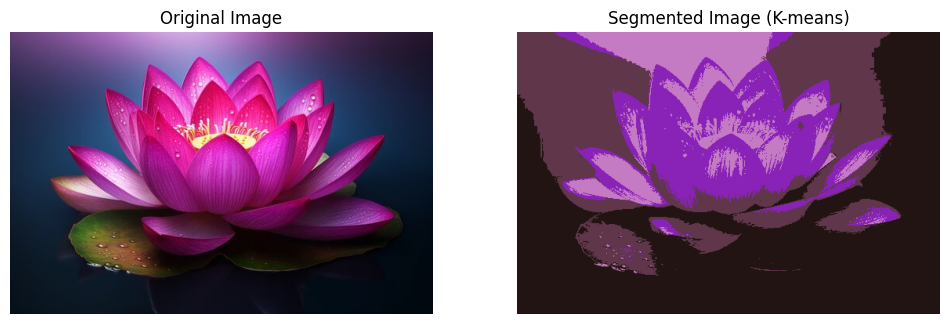

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('lotus.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib

# Convert image to a 2D array of pixels (reshape to 2D array of pixel values)
Z = img.reshape((-1, 3))

# Convert to float32, as k-means requires float32
Z = np.float32(Z)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back the centers to 8 bit values (as they are in float32)
centers = np.uint8(centers)

# Map the labels to centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(img.shape)

# Display the original and segmented image using matplotlib
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (K-means)')
plt.axis('off')

# Show the images
plt.show()

# Optionally save the segmented image
cv2.imwrite('segmented_image.jpg', segmented_image)


Explanation of the Code:
Loading and Preprocessing the Image:

The image is loaded using cv2.imread() and converted from BGR to RGB using cv2.cvtColor(). This is done because OpenCV loads images in BGR format by default, but matplotlib displays images in RGB format.
Reshaping the Image:

The image is reshaped from a 3D array (height x width x color channels) to a 2D array of pixel values (height * width x 3). Each row represents a pixel, and each pixel has three values corresponding to the Red, Green, and Blue channels.
Applying K-means Clustering:

We convert the image data to float32, which is required for OpenCV’s cv2.kmeans() function.
We set the criteria for K-means: either the algorithm should stop when the specified accuracy (epsilon) is achieved or after a maximum number of iterations (100).
We specify K=4 to segment the image into 4 clusters (you can adjust this number as needed).
cv2.kmeans() returns the labels (cluster assignments) for each pixel and the cluster centers (average color of each cluster).
Generating the Segmented Image:

Using the labels and cluster centers, we map each pixel to its corresponding cluster center. This creates the segmented image where each region of the image is assigned one of the cluster colors.
Displaying the Results:

We use matplotlib to display the original image and the segmented image side by side.
Saving the Segmented Image:

The segmented image is saved to a file named segmented_image.jpg.